the trend of mostly ordered products by month


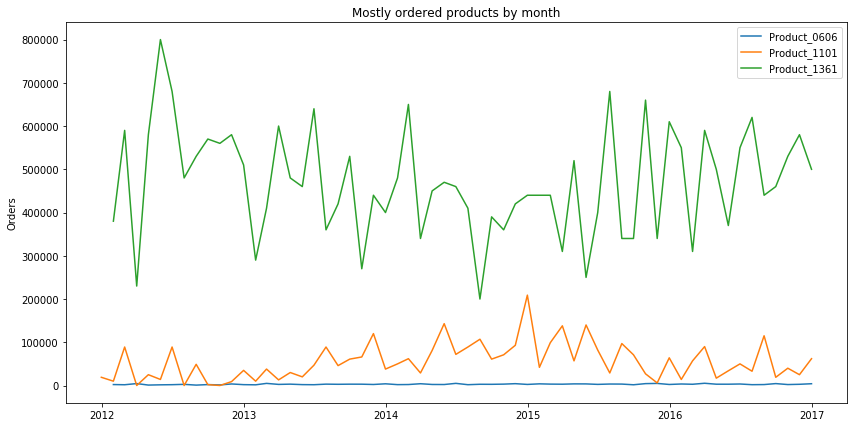

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw = pd.read_csv("../data/raw/raw.csv")
raw['Order_Demand'] = raw['Order_Demand'].apply(lambda x: int(x.replace("(", "").replace(")", "")))
def agg_attrs_by_month(attr_dict, return_raw=False):
    df = raw
    for attr in attr_dict:
        df = df[df[attr] == attr_dict[attr]]

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date']).dropna()
    df = df.set_index('Date')
    df.groupby(pd.Grouper(freq="M"))
    sum = df.groupby(pd.Grouper(freq="M")).sum()
    data = list(sum['Order_Demand'])
    dates = list(sum.index)
    if return_raw is True:
        return sum['Order_Demand'], dates
    return data, dates

print "the trend of mostly ordered products by month"
most_ordered_products_by_ctg = ['Product_0606', 'Product_1101', 'Product_1361']
for product in most_ordered_products_by_ctg:
    data, dates = agg_attrs_by_month({'Product_Code': product}, return_raw=False)
    fig = plt.figure(1, figsize=[14, 7])
    plt.ylabel('Orders')
    # plt.xlabel('')
    plt.title('Mostly ordered products by month')
    plt.plot(dates, data)
plt.legend(most_ordered_products_by_ctg)
plt.show()

plot shifting


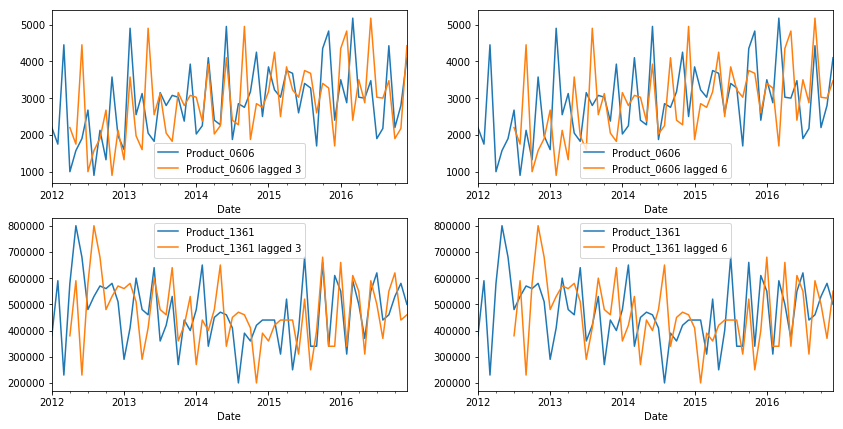

In [10]:
print "plot shifting"


def plot_shifts(attr, attr_value, offset):
    df = raw[raw[attr] == attr_value]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date']).dropna()
    df = df.set_index('Date')
    grouper = df.groupby(pd.Grouper(freq="M"))
    sum = grouper.sum()
    df_shift = sum.shift(offset)

    sum['Order_Demand'].plot(legend=True)
    shifted = df_shift['Order_Demand'].plot(legend=True)
    shifted.legend([attr_value, '{} lagged {}'.format(attr_value, offset)])
    
fig = plt.figure(4, figsize=[14, 7])
ax1 = fig.add_subplot(221)
plot_shifts('Product_Code', 'Product_0606', 3)
fig.add_subplot(222)
plot_shifts('Product_Code', 'Product_0606', 6)
fig.add_subplot(223)
plot_shifts('Product_Code', 'Product_1361', 3)
fig.add_subplot(224)
plot_shifts('Product_Code', 'Product_1361', 6)

comparing trends of different categories by month


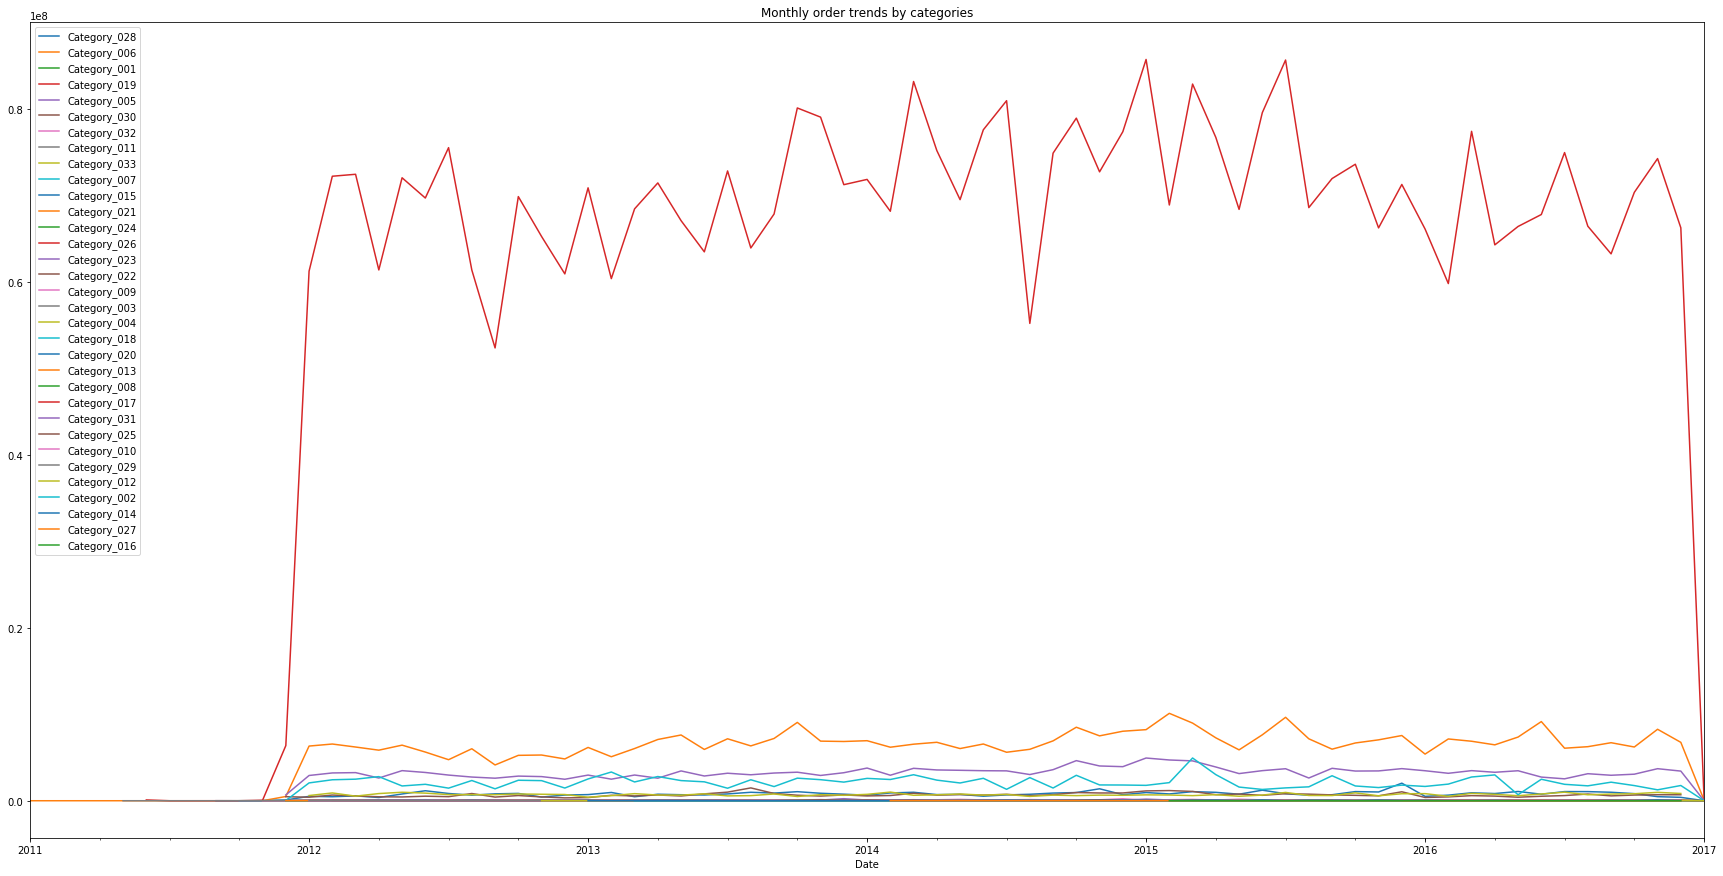

In [14]:
print 'comparing trends of different categories by month'
def compare_attr_by_month(attr):
    
    unique_values = list(raw[attr].unique())
    for value in unique_values:
        agg_data, dates = agg_attrs_by_month({attr: value}, return_raw=True)
        plot = agg_data.plot(legend=True)

    plot.legend(unique_values)
    plt.show()
plt.figure(1, figsize=[30, 15])
plt.title('Monthly order trends by categories')
compare_attr_by_month('Product_Category')

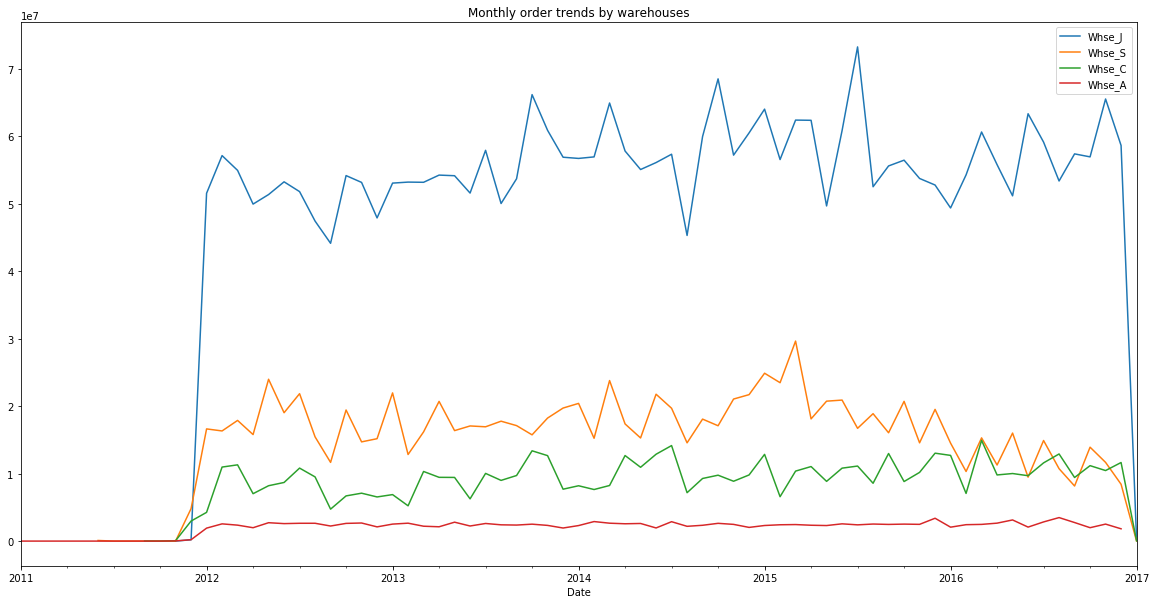

In [16]:
plt.figure(1, figsize=[20, 10])
plt.title('Monthly order trends by warehouses')
compare_attr_by_month('Warehouse')

Monthly order trends of single product by warehouses


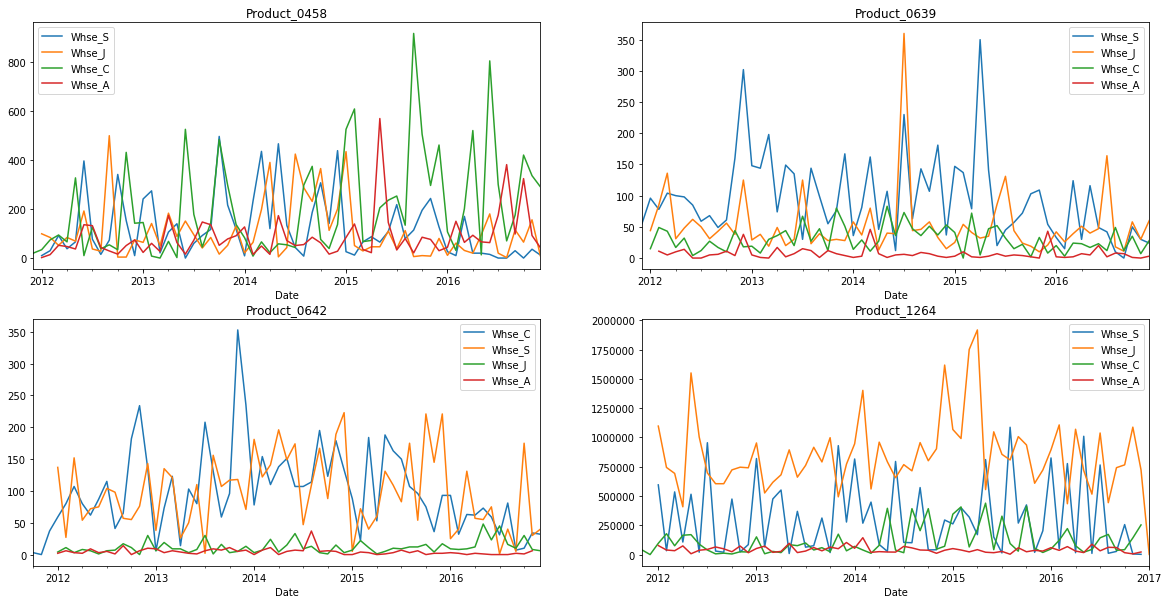

In [31]:
print "Monthly order trends of single product by warehouses"
fig = plt.figure(4, figsize=[20, 10])
products_with_4_warehouses = ['Product_0458', 'Product_0639', 'Product_0642', 'Product_1264']
def compare_prod_by_warehouse(product):
    df = raw[raw['Product_Code'] == product]
    unique_values = list(df['Warehouse'].unique())
    for value in unique_values:
        agg_data, dates = agg_attrs_by_month({'Warehouse': value, 'Product_Code': product}, return_raw=True)
        plot = agg_data.plot(legend=True)
    plot.legend(unique_values)
    
    plt.title(product)

for idx, product in enumerate(products_with_4_warehouses):
    fig.add_subplot(int('22{}'.format(idx + 1)))
    compare_prod_by_warehouse(product)

plt.show()